### Importing Necessary Libraries

In this cell, we import all the necessary libraries for data manipulation, visualization, and preprocessing. The libraries include:

- `numpy`: For numerical operations.
- `pandas`: For data manipulation and analysis.
- `matplotlib.pyplot`: For data visualization.
- `datetime`: For handling date and time data.
- `MinMaxScaler`: From `sklearn.preprocessing`, used for normalizing the data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler

### Data Loading and Initial Preprocessing
In this cell, we:
1. Load the dataset from an Excel file into a pandas DataFrame.
2. Convert the 'Sample Date-Time' column into a datetime object for easier manipulation.
3. Set the 'Sample Date-Time' column as the index for the DataFrame.
4. Drop unnecessary columns that won't be used in the analysis.


In [2]:
# Import the Excel data into a pandas DataFrame
BL_full = pd.read_excel(r'/Users/imemeulenbelt/Desktop/Data/Excel data/Gamma Spectrometry meeting.xlsx')

# Convert the 'Sample Date-Time' column to a datetime object
BL_full['Sample Date-Time'] = pd.to_datetime(BL_full['Sample Date-Time'])

# Set the 'Sample Date-Time' column as the index of the DataFrame
BL_full.set_index('Sample Date-Time', inplace=True)

# Drop some columns that aren't necessary
BL_full.drop(columns=['Detector used', 'Analysis Date-Time', 'Sample-Analysis time (hr aprox.)', 'Reactor start', 'Reactor stop'], inplace=True)


### Data Normalisation
Here, we normalize the dataset to ensure that all numerical columns have values between 0 and 1. This is especially useful for algorithms that are sensitive to feature scales. The steps include:
1. Initializing the `MinMaxScaler`.
2. Selecting numeric columns from the DataFrame.
3. Applying the scaler to normalize the numeric columns.
4. Combining the normalized data with the 'Week' column to get the final normalized DataFrame.


In [3]:
# Normalize the data
scaler = MinMaxScaler()
numeric_columns = BL_full.select_dtypes(include=[np.number]).drop(columns='Week', errors='ignore')
normalized_BL_full = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns, index=numeric_columns.index)
normalized_BL_full = pd.concat([BL_full['Week'], normalized_BL_full], axis=1)


### Normalisation constants
This cell calculates the normalization constants for each numeric column. The scaler object, which is presumably a MinMaxScaler from scikit-learn, provides the minimum values (data_min_) and range values (data_range_) for each column. These values are stored in a dictionary called normalization_constants, where each key is a column name, and the associated value is another dictionary containing the 'min' and 'range' for that column.

In [10]:
min_values = scaler.data_min_
range_values = scaler.data_range_

# Store these values in a dictionary
normalization_constants = {column: {'min': min_value, 'range': range_value} 
                           for column, min_value, range_value in zip(numeric_columns.columns, min_values, range_values)}

def dict_to_latex_table(data):
    header = "\\begin{table}[h]\n\\centering\n\\begin{tabular}{|c|c|c|}\n\\hline\n"
    header += "Element & Min & Range \\\\\n\\hline\n"
    
    rows = []
    for key, values in data.items():
        row = f"{key} & {values['min']} & {values['range']} \\\\\n"
        rows.append(row)
    
    footer = "\\hline\n\\end{tabular}\n\\caption{Normalization Constants}\n\\label{tab:normalization_constants}\n\\end{table}"
    
    return header + ''.join(rows) + footer

latex_table = dict_to_latex_table(normalization_constants)
#print(latex_table)


In [5]:
import numpy as np

# Define the groups
groups = {
    'Volatile & Gaseous': ['85mKr', '87Kr', '88Kr', '133Xe', '135Xe', '91Sr', '91mY', '92Sr', '97Nb', '103Ru', '131I', '132I', '133I', '134I', '135I', '138Ba', '138Cs', '139Ce', '140Ba', '141Ce'],
    #'Volatile': ['91Sr', '91mY', '92Sr', '97Nb', '103Ru', '131I', '132I', '133I', '134I', '135I', '138Ba', '138Cs', '139Ce', '140Ba', '141Ce'],
    'Contaminant': ['122Sb', '124Sb', '239Np'],
    'Structural': ['24Na', '41Ar', '54Mn', '56Mn', '60Co', '99Mo', '99mTc', '109Cd', '115Cd', '115mIn'],
    'pH_Eh_related': ['51Cr', '110mAg', '188Re'],
    'Unknown/False_positives': ['55Fe', '56Co', '56Ni', '93mNb','117mSn' '123I', '124I', '125I', '125mTe', '231Th']
    #'Ni-56, Sn-117m and I-123': ['56Ni', '117mSn', '123I']
}

# Define the groups
groups_with_strange = {
    #'Gaseous': ['85Kr', '89Kr', '131mXe', '133mXe', '137Xe', '138Xe'],
    'Volatile & Gaseous': ['85Kr', '89Kr', '131mXe', '133mXe', '137Xe', '138Xe','84Br', '88Rb', '89Rb', '92Y', '93Sr', '93Y', '94Y', '105Rh', '131Te', '131xTe', '132Te', '136Cs', '137Cs', '138Cs', '144Ce', '144Pr'],
    'Structural': ['57Co', '58Co', '59Fe', '65Ni', '95Zr', '97Zr', '108mAg', '125Sb'],
    'Contaminant': ['38Cl', '42K'],
    'pH_Eh_related': ['181W', '186Re', '187W', '188W'],
    'Unknown/False_positive': [
        '7Be', '22Na', '40K', '44Ti', '46Sc', '64Cu', '65Zn', '67Ga', '69mZn', '75Se', '76As', '82Br', '83*Rb', '85*Sr',
        '88*Y', '89Zr', '90Mo', '94Nb', '95Nb', '95mNb', '96Nb', '96Tc', '97Nb', '110Sn', '111In', '113Sn', '114mIn',
        '121Te', '121xTe', '123mTe', '125mTe', '125Xe', '126I', '132Cs', '133Ba', '132Cs', '138La', '138Nd', '152Eu',
        '153Sm', '154Eu', '155Eu', '159Gd', '161Tb', '166mHo', '169Yb', '173Lu', '174Lu', '175Lu', '175Yb', '176Lu',
        '177Lu', '177xLu', '181Hf', '181W', '182Ta', '183Ta', '191Os', '192Ir', '193Os', '195Au', '195Hg', '195mPt',
        '199mHg', '202Tl', '203Hg', '203Pb', '207Bi', '207Tl', '208Tl', '210xBi', '210Pb', '211Bi', '211Pb', '212Bi',
        '212Pb', '214Bi', '214Pb', '219Rn', '223Fr', '223Ra', '224Ra', '225Ac', '226Ra', '227Ra', '227Th', '228Ac',
        '228Th', '231Pa', '231Th', '231U', '232Th', '233Pa', '234Pa', '234Th', '235U', '237Np', '241Am', '243Am', '243Cm', '245Cm']
}

# Initialize a DataFrame to store the baseline information
baseline_info = pd.DataFrame(columns=['Week'])

# Iterate through the groups and calculate the baseline for each week
for group_name, group_columns in groups.items():
    # Check if all columns exist in the DataFrame
    missing_columns = [col for col in group_columns if col not in normalized_BL_full.columns]
    
    if missing_columns:
        print(f"Warning: Columns {missing_columns} are missing from the DataFrame. Skipping processing for these columns.")
        # Remove missing columns from group_columns
        group_columns = [col for col in group_columns if col not in missing_columns]
    
    group_columns_with_week = ['Week'] + group_columns
    Group = normalized_BL_full[group_columns_with_week]

    for i in range(6):  # Assuming you have data for weeks 0 to 5 inclusive
        mask = Group['Week'] == i
        Group_week = Group[mask].copy()
        
        if Group_week.empty:
            continue
        
        n_isotopes_measured = Group_week[group_columns].gt(0).sum(axis=1)  # Count number of non-zero values for each week
        sum_column = np.where(n_isotopes_measured == 0, 0, Group_week[group_columns].sum(axis=1) / n_isotopes_measured)
        
        # Calculate the minimum and maximum values
        lower_bound = sum_column.min()
        upper_bound = sum_column.max()
        mean_value = sum_column.mean()  # Calculate the mean
        
        week_mask = baseline_info['Week'] == i
        if week_mask.any():
            baseline_info.loc[week_mask, f'LowerLimit_{group_name}'] = lower_bound
            baseline_info.loc[week_mask, f'UpperLimit_{group_name}'] = upper_bound
            baseline_info.loc[week_mask, f'Mean_{group_name}'] = mean_value  # Store the mean
        else:
            new_row = {
                'Week': i,
                f'LowerLimit_{group_name}': lower_bound,
                f'UpperLimit_{group_name}': upper_bound,
                f'Mean_{group_name}': mean_value  # Store the mean in the new row
            }
            baseline_info = baseline_info.append(new_row, ignore_index=True)


/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_2665/3232266532.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baseline_info = baseline_info.append(new_row, ignore_index=True)
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_2665/3232266532.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baseline_info = baseline_info.append(new_row, ignore_index=True)
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_2665/3232266532.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baseline_info = baseline_info.append(new_row, ignore_index=True)
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_2665/3232266532.py:75: FutureWarning: The frame.append method is deprecated and will be removed

The bootstrap method has been applied to calculate the 95% confidence intervals for each group and week. By resampling our data 10,000 times with replacement, we've estimated the distribution of the mean for each group and week. The resulting confidence intervals provide a range in which we expect the true mean to lie with 99% confidence.


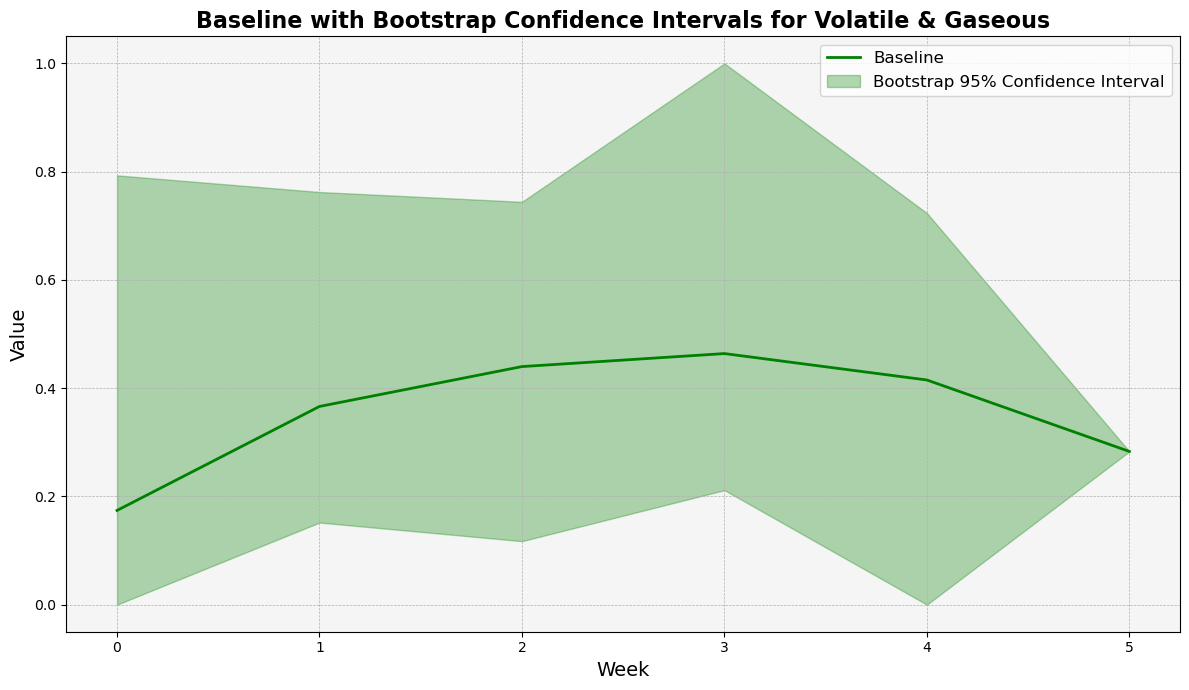

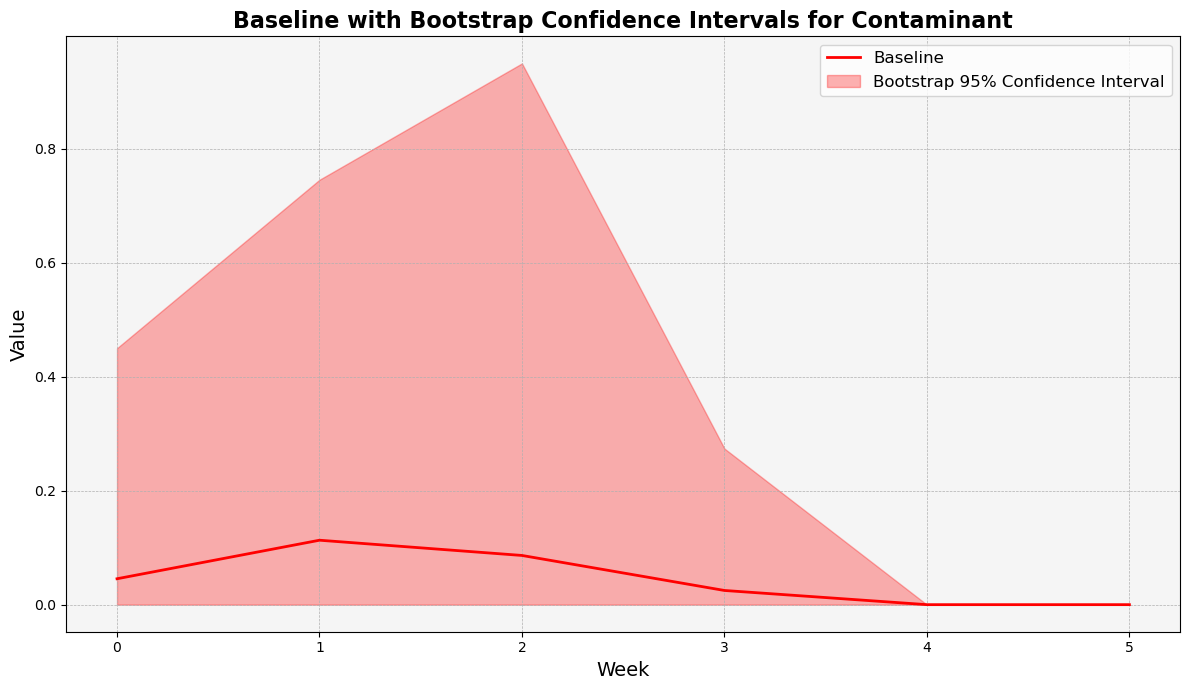

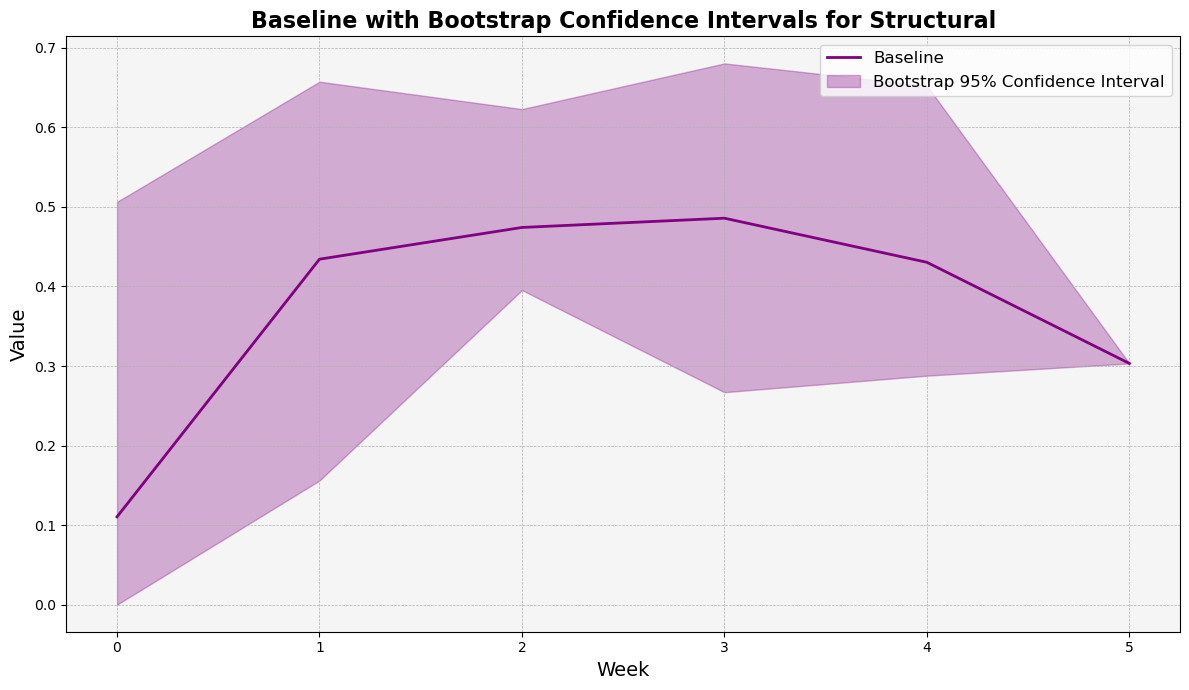

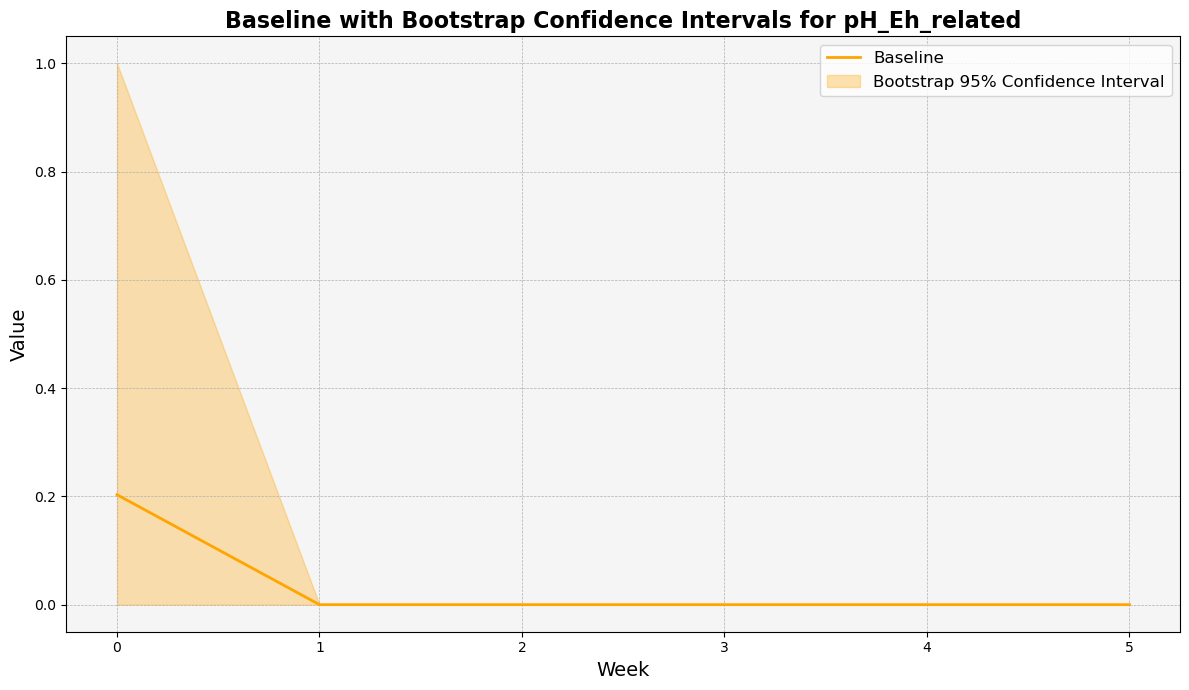

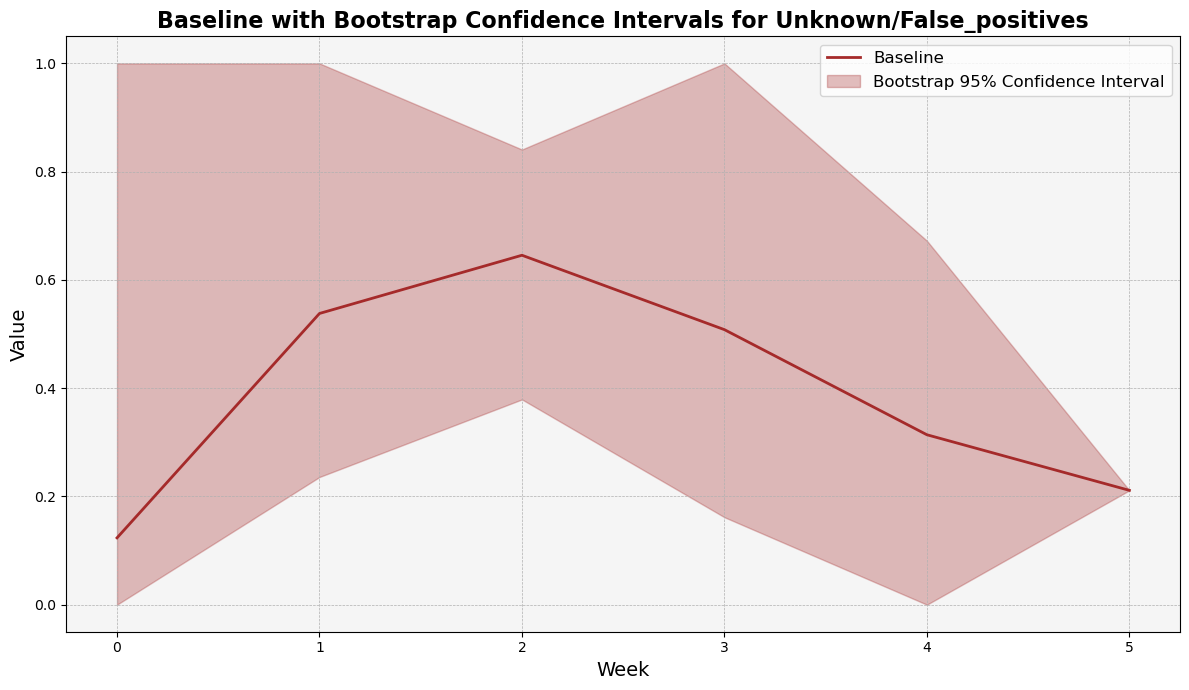

In [6]:
import matplotlib.pyplot as plt

# Define a color palette
color_palette = {
    #'Gaseous': 'navy',
    'Volatile & Gaseous': 'green',
    'Contaminant': 'red',
    'Structural': 'purple',
    'pH_Eh_related': 'orange',
    'Unknown/False_positives': 'brown'
    #'Ni-56, Sn-117m and I-123': 'brown'
}

# Visual Representation with Bootstrap Confidence Intervals
for group_name in groups:
    plt.figure(figsize=(12, 7))
    
    # Get the color for the current group from the palette
    group_color = color_palette[group_name]
    
    # Plot the mean values
    plt.plot(baseline_info['Week'], baseline_info[f'Mean_{group_name}'], 
             label='Baseline', color=group_color, linewidth=2, linestyle='-')
    
    # Fill the area for the 95% confidence interval with a lighter shade of the group color
    plt.fill_between(baseline_info['Week'], 
                     baseline_info[f'LowerLimit_{group_name}'], 
                     baseline_info[f'UpperLimit_{group_name}'], 
                     color=plt.cm.colors.to_rgba(group_color, alpha=0.3), 
                     label='Bootstrap 95% Confidence Interval')
    
    # Set the title and labels with enhanced font sizes
    plt.title(f'Baseline with Bootstrap Confidence Intervals for {group_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Week', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    
    # Display the legend
    plt.legend(fontsize=12)
    
    # Adjust the grid style
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Set the background color for the plot for better contrast
    plt.gca().set_facecolor('whitesmoke')
    
    # Show the plot
    plt.tight_layout()
    plt.show()


The plots above show the calculated baselines along with the 95% bootstrap confidence intervals for each group. The shaded region represents the range in which we expect the true mean to lie with 95% confidence, based on our bootstrap resampling.


# Xe-133 to 135 Ratio

In [7]:
n_bootstrap = 10000

# Assuming original_data is a DataFrame containing the original values for Xe-133 and Xe-135
Xe_133 = BL_full['133Xe']
Xe_135 = BL_full['135Xe']

# Initialize a dictionary to store bootstrap means for the ratio for each week
bootstrap_means_ratio = {week: [] for week in range(6)}

# Calculate the ratio and perform bootstrap resampling
for i in range(6):  # Assuming you have data for weeks 0 to 5 inclusive
    mask = BL_full['Week'] == i
    ratio_week = np.where(Xe_135[mask] == 0, 0, Xe_133[mask] / Xe_135[mask])
    
    # Bootstrap resampling
    for _ in range(n_bootstrap):
        sample = np.random.choice(ratio_week, size=len(ratio_week), replace=True)
        bootstrap_means_ratio[i].append(sample.mean())

# Calculate the 2.5th and 97.5th percentiles for the 95% confidence interval
for i in range(6):
    lower_bound = np.percentile(bootstrap_means_ratio[i], 0.5)
    upper_bound = np.percentile(bootstrap_means_ratio[i], 99.5)
    mean_value = np.mean(bootstrap_means_ratio[i])  # Calculate the mean
    
    week_mask = baseline_info['Week'] == i
    if week_mask.any():
        baseline_info.loc[week_mask, 'LowerLimit_Xe133_Xe135'] = lower_bound
        baseline_info.loc[week_mask, 'UpperLimit_Xe133_Xe135'] = upper_bound
        baseline_info.loc[week_mask, 'Mean_Xe133_Xe135'] = mean_value  # Store the mean
    else:
        new_row = {
            'Week': i,
            'LowerLimit_Xe133_Xe135': lower_bound,
            'UpperLimit_Xe133_Xe135': upper_bound,
            'Mean_Xe133_Xe135': mean_value  # Store the mean in the new row
        }
        baseline_info = baseline_info.append(new_row, ignore_index=True)

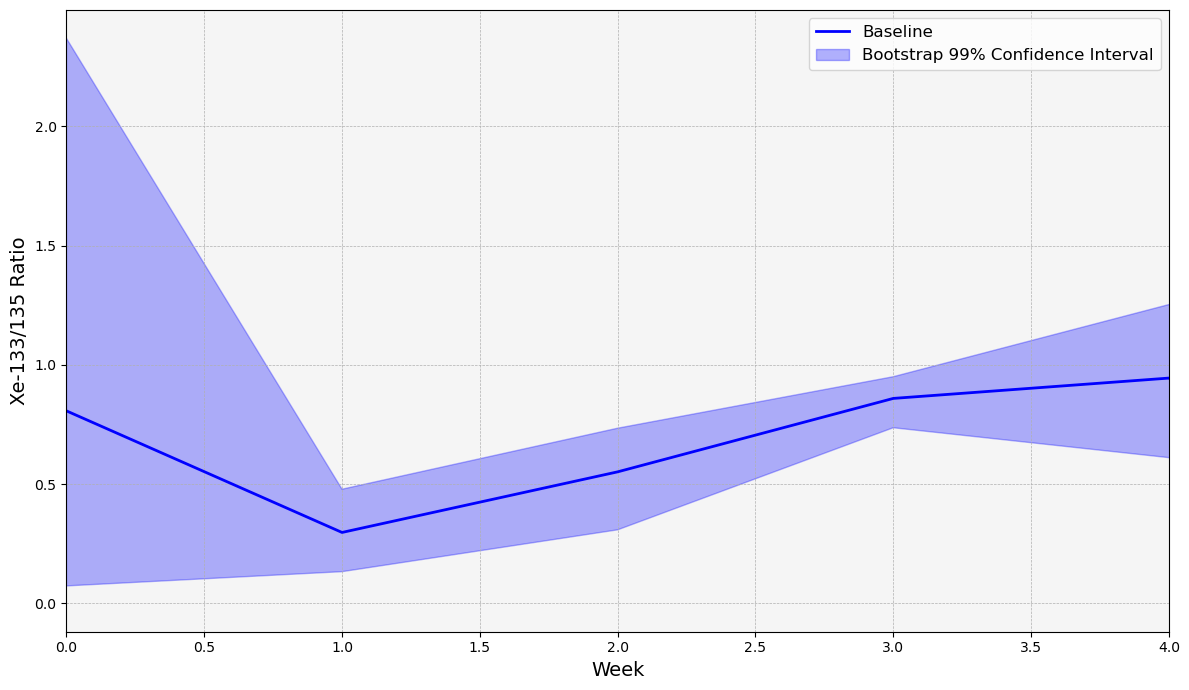

In [8]:
# Define a colour for the Xe-133/Xe-135 ratio
ratio_color = 'blue'

# Visual Representation with Bootstrap Confidence Intervals for Xe-133/Xe-135 Ratio
plt.figure(figsize=(12, 7))

# Plot the mean values
plt.plot(baseline_info['Week'], baseline_info['Mean_Xe133_Xe135'], 
         label='Baseline', color=ratio_color, linewidth=2, linestyle='-')

# Fill the area for the 95% confidence interval with a lighter shade of the ratio color
plt.fill_between(baseline_info['Week'], 
                 baseline_info['LowerLimit_Xe133_Xe135'], 
                 baseline_info['UpperLimit_Xe133_Xe135'], 
                 color=plt.cm.colors.to_rgba(ratio_color, alpha=0.3), 
                 label='Bootstrap 99% Confidence Interval')

# Set the title and labels with enhanced font sizes
#plt.title('Baseline with Bootstrap Confidence Intervals for Xe-133/Xe-135 Ratio', fontsize=16, fontweight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Xe-133/135 Ratio', fontsize=14)
plt.xlim(0,4)

# Display the legend
plt.legend(fontsize=12)

# Adjust the grid style
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the background color for the plot for better contrast
plt.gca().set_facecolor('whitesmoke')

# Show the plot
plt.tight_layout()
plt.show()


### Conversion of DataFrame to Dictionary and String

This cell converts the baseline_info DataFrame into a dictionary format and subsequently into a string format.

First, the to_dict() method is used to convert the DataFrame into a dictionary, where each key represents a column name and the associated value is another dictionary containing the data for that column.
The dictionary is then converted into a string format using the str() function.
The resulting string is printed, allowing users to easily copy and utilize the string representation of the baseline information.

In [11]:
# Convert the DataFrame to a dictionary
dict_baseline_info = baseline_info.to_dict()

# Convert the dictionary to a string
str_baseline_info = str(dict_baseline_info)

# Print the string so you can copy it
#print(str_baseline_info)
